In [106]:
!install pandas numpy matplotlib seaborn scikit-learn

install: target 'scikit-learn': No such file or directory


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [108]:
# Set style for plots
plt.style.use('ggplot') 
sns.set_theme(style="whitegrid")
sns.set_palette("viridis")

In [109]:
# Load the dataset
df = pd.read_csv('house_price.csv')
df.head()

,owner_name,city,area,rooms,age,distance_to_center,has_garage,has_garden,price
0,Dilshod,Bukhara,152,2,12,14.456253,1,1,453040.380829
1,Gulbahor,Tashkent,229,3,19,12.545485,0,0,621130.940769
2,Dilshod,Namangan,142,2,24,22.239961,0,0,319425.749652
3,Gulbahor,Fergana,64,2,3,13.726363,1,1,179285.552641
4,Dilshod,Tashkent,156,2,9,11.584772,1,1,465007.680305


In [110]:
# 1. Initial Data Exploration
df.shape

(500, 9)

In [111]:
# Data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   owner_name          500 non-null    object 
 1   city                500 non-null    object 
 2   area                500 non-null    int64  
 3   rooms               500 non-null    int64  
 4   age                 500 non-null    int64  
 5   distance_to_center  500 non-null    float64
 6   has_garage          500 non-null    int64  
 7   has_garden          500 non-null    int64  
 8   price               500 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 35.3+ KB


In [112]:
# summary statistics
df.describe()

,area,rooms,age,distance_to_center,has_garage,has_garden,price
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,178.296000,3.0140,20.162000,13.130537,0.526000,0.526000,489560.977821
std,71.772802,1.4581,11.816387,6.936195,0.499824,0.499824,204789.612227
min,50.000000,1.0000,0.000000,1.005701,0.000000,0.000000,91116.780664
25%,113.750000,2.0000,9.000000,7.062850,0.000000,0.000000,312540.965781
50%,179.000000,3.0000,21.000000,13.547247,1.000000,1.000000,490515.195123
75%,239.000000,4.0000,30.250000,18.956659,1.000000,1.000000,664372.866157
max,299.000000,5.0000,39.000000,24.912059,1.000000,1.000000,895468.986021


In [113]:
# check for missing values
df.isnull().sum()

owner_name            0
city                  0
area                  0
rooms                 0
age                   0
distance_to_center    0
has_garage            0
has_garden            0
price                 0
dtype: int64

In [114]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

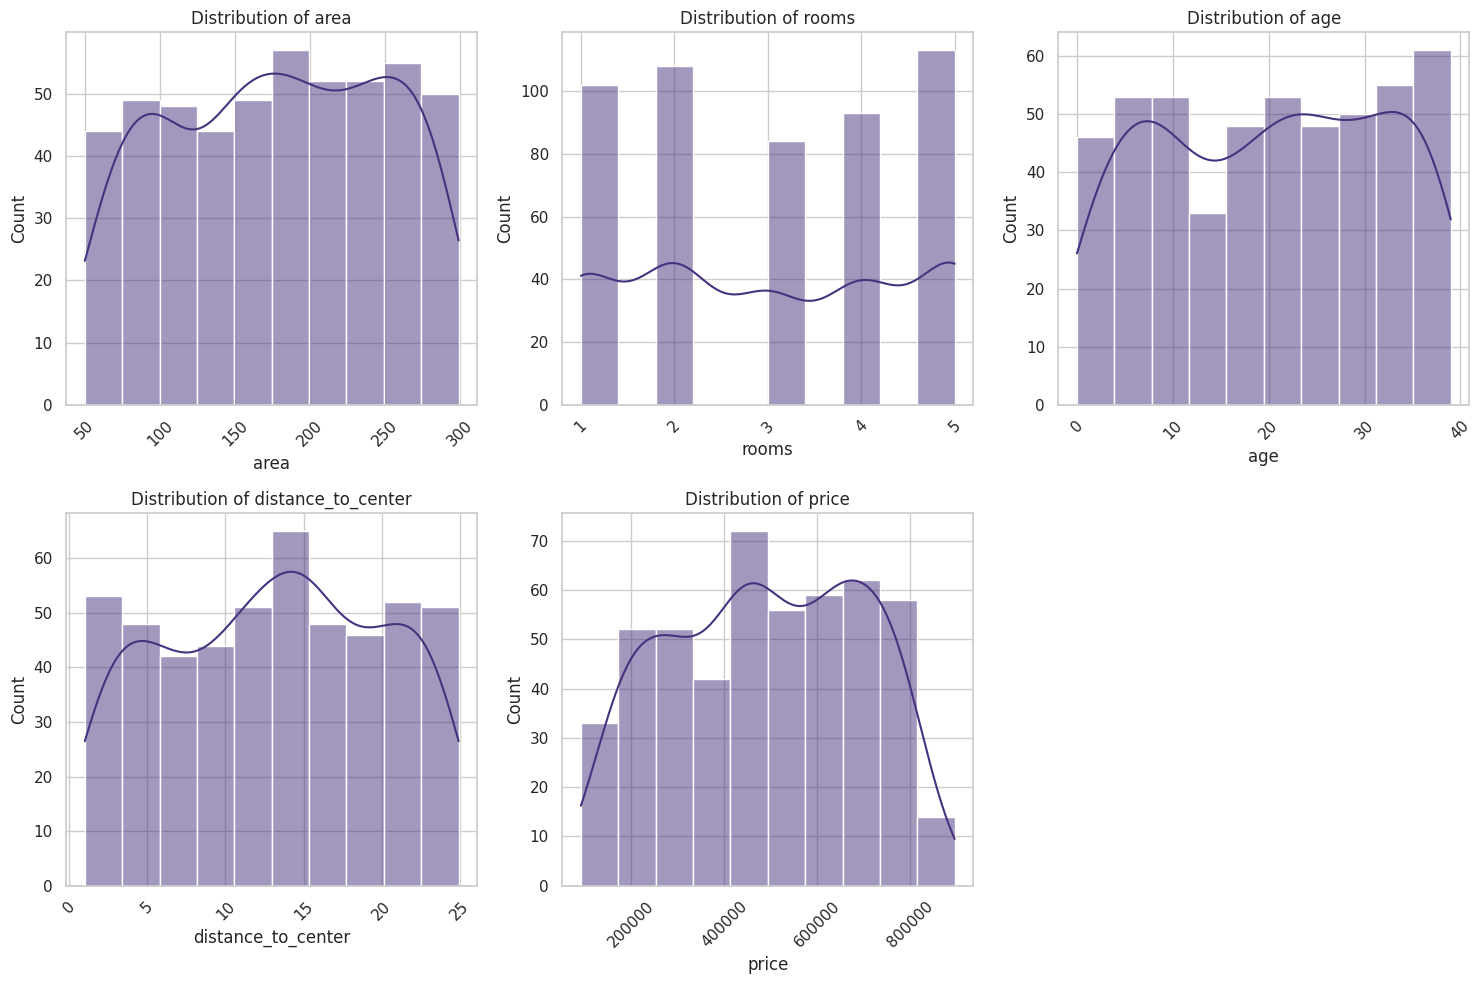

In [115]:
# EDA
# plot distributions of numerical features
plt.figure(figsize=(15, 10))
num_cols = ['area', 'rooms', 'age', 'distance_to_center', 'price']
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('numerical_distributions.png')

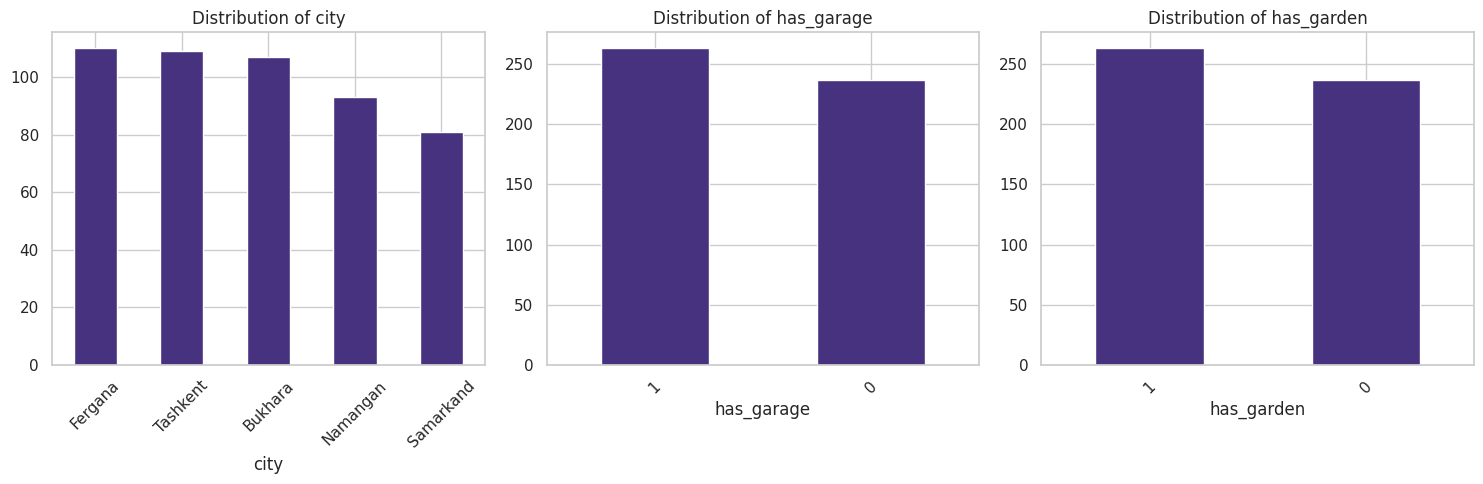

In [116]:
# plot categorical features
plt.figure(figsize=(15, 5))
cat_cols = ['city', 'has_garage', 'has_garden']
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('categorical_distributions.png')

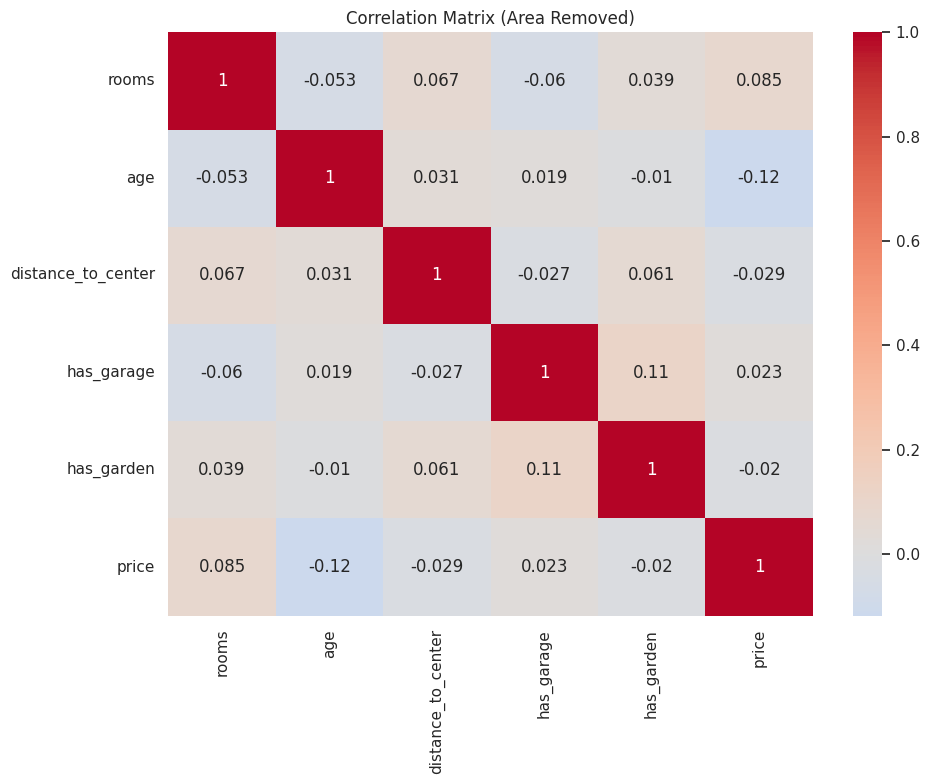

In [117]:
# Drop the 'area' column
df = df.drop('area', axis=1)

# Then create the correlation matrix
plt.figure(figsize=(10, 8))
corr = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Area Removed)')
plt.tight_layout()
plt.savefig('correlation_matrix.png')

In [118]:
# feature engineering
df['distance_age_interaction'] = df['distance_to_center'] * df['age']


In [119]:
# 3. Polynomial features
df['distance_squared'] = df['distance_to_center'] ** 2


In [120]:
# 4. Combined binary features
df['has_garage_and_garden'] = (df['has_garage'] == 1) & (df['has_garden'] == 1)
df['has_garage_and_garden'] = df['has_garage_and_garden'].astype(int)

In [121]:
# 5. Binning continuous variables
bins = [0, 5, 15, 30, 50, 100]
labels = ['0-5', '6-15', '16-30', '31-50', '51+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)


In [122]:
# Separate features and target
X = df.drop(['price', 'owner_name'], axis=1)
y = df['price']
X

,city,rooms,age,distance_to_center,has_garage,has_garden,distance_age_interaction,distance_squared,has_garage_and_garden,age_group
0,Bukhara,2,12,14.456253,1,1,173.475032,208.983241,1,6-15
1,Tashkent,3,19,12.545485,0,0,238.364219,157.389199,0,16-30
2,Namangan,2,24,22.239961,0,0,533.759053,494.615846,0,16-30
3,Fergana,2,3,13.726363,1,1,41.179090,188.413046,1,0-5
4,Tashkent,2,9,11.584772,1,1,104.262947,134.206940,1,6-15
...,...,...,...,...,...,...,...,...,...,...
495,Samarkand,1,16,23.310541,1,1,372.968657,543.381324,1,16-30
496,Bukhara,2,13,13.774245,1,0,179.065187,189.729829,0,6-15
497,Namangan,4,30,14.942369,1,1,448.271078,223.274400,1,16-30
498,Namangan,1,23,3.151032,1,0,72.473739,9.929004,0,16-30


In [123]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Define preprocessing for numerical and categorical features
numeric_features = [
    'rooms', 'age', 'distance_to_center',
    'distance_age_interaction', 'distance_squared'
]

categorical_features = ['city', 'age_group', 'has_garage', 'has_garden', 'has_garage_and_garden']


In [125]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [126]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [127]:
# 6. Model Training and Evaluation
def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluate a model using cross-validation and test set metrics.
    
    Args:
        model: The scikit-learn model to evaluate
        X_train: Training features
        y_train: Training target
        X_test: Test features
        y_test: Test target
        
    Returns:
        dict: Dictionary containing evaluation metrics
    """
    try:
        # Create pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
        ('model', model)
    ])
    
        # Train the model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        # Additional metrics
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
        
        # Cross-validation with multiple metrics
        scoring = {
            'r2': 'r2',
            'neg_mse': 'neg_mean_squared_error',
            'neg_mae': 'neg_mean_absolute_error'
        }
        
        cv_results = cross_validate(
            pipeline, X_train, y_train, 
            cv=5, 
            scoring=scoring,
            return_train_score=False
        )
        
        # Calculate mean and std for each metric
        cv_metrics = {}
        for metric in scoring.keys():
            cv_metrics[f'cv_{metric}_mean'] = cv_results[f'test_{metric}'].mean()
            cv_metrics[f'cv_{metric}_std'] = cv_results[f'test_{metric}'].std()
        
        # Calculate feature importance if available
        feature_importance = None
        try:
            if hasattr(model, 'feature_importances_'):
                # For tree-based models
                feature_importance = model.feature_importances_
            elif hasattr(model, 'coef_'):
                # For linear models
                feature_importance = np.abs(model.coef_)
        except Exception as e:
            print(f"Could not calculate feature importance: {str(e)}")
        
        return {
            'model': model.__class__.__name__,
            'mse': mse,
            'rmse': rmse,
            'mae': mae,
            'mape': mape,
            'r2': r2,
            **cv_metrics,
            'feature_importance': feature_importance
        }
        
    except Exception as e:
        print(f"Error evaluating model {model.__class__.__name__}: {str(e)}")
        return {
            'model': model.__class__.__name__,
            'error': str(e)
        }


In [128]:
# Initialize models
models = [
    LinearRegression(),
    Lasso(alpha=0.1, random_state=42),
    Ridge(alpha=1.0, random_state=42),
    ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
]

In [129]:
# Evaluate models
results = []
for model in models:
    print(f"\nTraining {model.__class__.__name__}...")
    result = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    if 'error' in result:
        print(f"Error with {model.__class__.__name__}: {result['error']}")
        continue
        
    results.append(result)
    print(f"{result['model']} - "
          f"R2: {result['r2']:.4f}, "
          f"RMSE: {result['rmse']:.2f}, "
          f"MAE: {result['mae']:.2f}, "
          f"MAPE: {result['mape']:.2f}%")


Training LinearRegression...
LinearRegression - R2: -0.1435, RMSE: 196710.05, MAE: 169845.34, MAPE: 45.43%

Training Lasso...
Lasso - R2: -0.1435, RMSE: 196709.96, MAE: 169845.33, MAPE: 45.43%

Training Ridge...
Ridge - R2: -0.1409, RMSE: 196482.83, MAE: 169722.65, MAPE: 45.41%

Training ElasticNet...
ElasticNet - R2: -0.1219, RMSE: 194842.28, MAE: 168824.55, MAPE: 45.39%


/home/mikey/Desktop/pdp_4th_grade/ai/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.782e+11, tolerance: 1.754e+09
  model = cd_fast.enet_coordinate_descent(
/home/mikey/Desktop/pdp_4th_grade/ai/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+11, tolerance: 1.371e+09
  model = cd_fast.enet_coordinate_descent(
/home/mikey/Desktop/pdp_4th_grade/ai/.venv/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

In [130]:
results_df = pd.DataFrame(results)

In [131]:
# Display model comparison
metrics_to_display = ['model', 'r2', 'rmse', 'mae', 'mape', 
                     'cv_r2_mean', 'cv_neg_mse_mean', 'cv_neg_mae_mean']
print(results_df[metrics_to_display].round(4))

              model      r2         rmse          mae     mape  cv_r2_mean  \
0  LinearRegression -0.1435  196710.0492  169845.3448  45.4268     -0.0191   
1             Lasso -0.1435  196709.9593  169845.3317  45.4268     -0.0191   
2             Ridge -0.1409  196482.8336  169722.6502  45.4115     -0.0166   
3        ElasticNet -0.1219  194842.2812  168824.5461  45.3873     -0.0042   

   cv_neg_mse_mean  cv_neg_mae_mean  
0    -4.420770e+10     -182684.4032  
1    -4.420760e+10     -182684.1603  
2    -4.410221e+10     -182481.5744  
3    -4.358800e+10     -181375.9125  


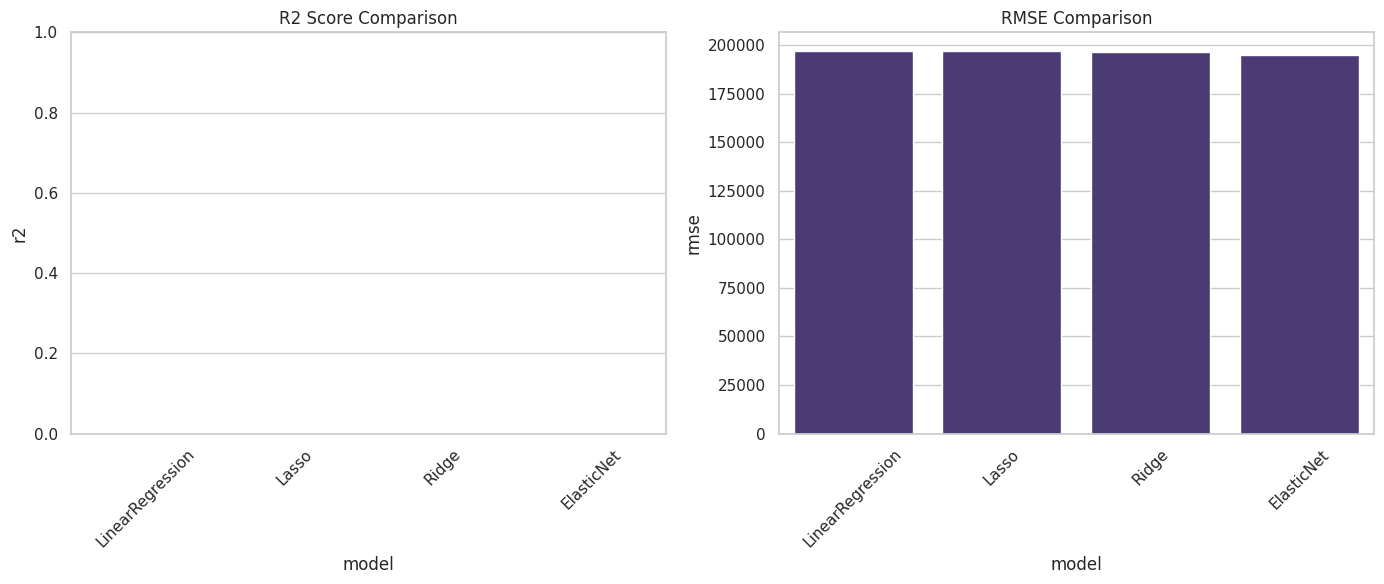

In [132]:
# Plot model comparison
plt.figure(figsize=(14, 6))

# R2 Score
plt.subplot(1, 2, 1)
sns.barplot(x='model', y='r2', data=results_df)
plt.title('R2 Score Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# RMSE
plt.subplot(1, 2, 2)
sns.barplot(x='model', y='rmse', data=results_df)
plt.title('RMSE Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('model_comparison.png')

In [133]:
# Feature importance analysis
if not results_df.empty:
    best_model_idx = results_df['r2'].idxmax()
    best_model_name = results_df.loc[best_model_idx, 'model']
    best_model = models[best_model_idx]
    
    print(f"\n=== Best Model: {best_model_name} ===")
    
    # Create pipeline for feature importance
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', best_model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    # Get the preprocessor and model from the pipeline
    preprocessor = pipeline.named_steps['preprocessor']
    model = pipeline.named_steps['model']
    
    # Get feature names after preprocessing
    numeric_features_final = numeric_features  # These stay the same
    
    # Get one-hot encoded feature names
    try:
        onehot_columns = list(preprocessor.named_transformers_['cat'].named_steps['onehot']
                             .get_feature_names_out(categorical_features))
    except Exception as e:
        print(f"Could not get one-hot encoded feature names: {e}")
        onehot_columns = []
    
    all_feature_names = numeric_features_final + onehot_columns
    
    # Get feature importance/coefficients
    if hasattr(model, 'feature_importances_'):
        # For tree-based models
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For linear models
        importances = np.abs(model.coef_)
    else:
        importances = None
    
    if importances is not None and len(importances) == len(all_feature_names):
        # Create feature importance DataFrame
        feature_importance = pd.DataFrame({
            'feature': all_feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        # Plot top 20 most important features
        plt.figure(figsize=(12, 8))
        top_n = min(20, len(feature_importance))
        sns.barplot(
            x='importance', 
            y='feature', 
            data=feature_importance.head(top_n),
            palette='viridis'
        )
        plt.title(f'Top {top_n} Most Important Features - {best_model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.savefig('feature_importance.png')
        plt.close()
        
        # Print top 10 features
        print("\nTop 10 Most Important Features:")
        print(feature_importance.head(10).to_string(index=False))
        
        # Save feature importance to CSV
        feature_importance.to_csv('feature_importance.csv', index=False)
    else:
        print("\nCould not calculate feature importance for the best model.")



=== Best Model: ElasticNet ===

Top 10 Most Important Features:
                 feature   importance
distance_age_interaction 43561.562287
      distance_to_center 29301.650985
                   rooms 26859.072195
          age_group_6-15 18732.538529
          city_Samarkand 15709.238287
        distance_squared 13905.085616
           age_group_0-5 11627.898541
 has_garage_and_garden_1 11516.290143
 has_garage_and_garden_0 11516.290058
            city_Bukhara  7555.902843


/tmp/ipykernel_63753/4049106747.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


In [134]:
# Save results to CSV
if not results_df.empty:
    results_df.to_csv('model_results.csv', index=False)